## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read 'ab_data.csv' file and sort in df
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('Rows: {}'.format(df.shape[0])) 

Rows: 294478


c. The number of unique users in the dataset.

In [4]:
print('Unique Users: {}'.format(df.user_id.nunique()))

Unique Users: 290584


d. The proportion of users converted.

In [5]:
print('Convert Rate: {}'.format(df.converted.mean()))

Convert Rate: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
print('Inaccurate Rows: {}'.format(df[(df['landing_page'] == 'new_page') != (df['group'] == 'treatment')].shape[0]))

Inaccurate Rows: 3893


f. Do any of the rows have missing values?

In [7]:
#number of null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[(df['landing_page'] == 'new_page') == (df['group'] == 'treatment')]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
print('Correct Rows: {}'.format(df2.shape[0]))

Correct Rows: 290585


In [10]:
# Double Check all of the incorrect rows were removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Unique Users: {}'.format(df2.user_id.nunique()))

Unique Users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Display the repeated user_id
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
#Display row information for the repeated user_id
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Remove one of the rows with a duplicate user_id
df2 = df2.drop_duplicates('user_id')

In [15]:
print('Unique Rows: {}'.format(df2.shape[0]))

Unique Rows: 290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#Calculate the population converted rate
p_population = df2['converted'].mean()
p_population

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Calculate the control group converted rate
p_control = df2.query("group == 'control'")['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#Calculate the treatment group converted rate
p_treatment = df2.query("group == 'treatment'")['converted'].mean()
p_treatment

0.11880806551510564

In [19]:
#Calculate the actual difference (obs_diff) between the conversion rates for the two groups
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [20]:
#Calculate the probability that an individual received the new page
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

****Probability of converting regardless of page is 0.1196 .<br>
*Given that an individual was in the control group, the probability of converting is 0.1204 .<br>
*Given that an individual was in the treatment group, the probability of converting is 0.1188 .<br>
*The probability of receiving the new page is 0.50 .<br>
<br>
So it is very hard to tell which page leads to more conversions than another, and we need to implement an experiment to see if the difference is statistically significant.***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 **$$H_{o}: p_{new} - p_{old} <= 0$$** <br>
 **$$H_{1}: p_{new} - p_{old} > 0$$**
  


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#Assume under the null hypothesis that the new page converted rate equal to population converted rate
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#Assume under the null hypothesis that the old page converted rate equal to population converted rate
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
#Calculate the number of individuals that received the new page  
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
#Calculate the number of individuals that received the old page  
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#Simulate Sample for the treatment Group
new_page_converted = np.random.choice(2, n_new, [1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#Simulate Sample for the control Group
old_page_converted = np.random.choice(2, n_old, [1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#Find the difference in the converted probability for the simulated samples
new_page_converted.mean() - old_page_converted.mean()

0.0021057301266188544

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
#Simulate the sampling distributions 10,000 times

new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation




i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

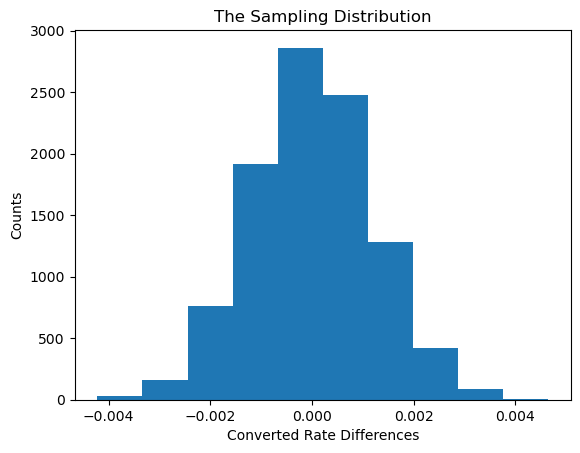

In [29]:
#Plot the sampling distribution of the difference under the null

plt.hist(p_diffs)
plt.xlabel('Converted Rate Differences')
plt.ylabel('Counts')
plt.title('The Sampling Distribution')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

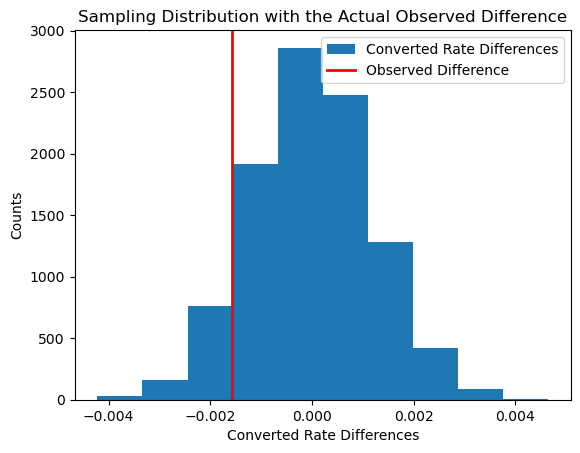

In [30]:
#Plot the Sampling Distribution with the Actual Observed Difference
plt.hist(p_diffs, label='Converted Rate Differences')
plt.axvline(obs_diff, color='r', linewidth=2, label='Observed Difference')
plt.xlabel('Converted Rate Differences')
plt.ylabel('Counts')
plt.title('Sampling Distribution with the Actual Observed Difference')
plt.legend()
plt.show()

In [31]:
#Calculate P_value 
(p_diffs > obs_diff).mean()

0.9074

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***The p_value (0.9) is greater than $a$ (0.05) so we fail to reject the null hypothesis, we can't assume that the new page is better than the old page.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()

# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").shape[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").shape[0]

In [33]:
print('convert_old = {} , convert_new = {} , n_old = {}, n_new = {}'.format(convert_old, convert_new, n_old, n_new))

convert_old = 17489 , convert_new = 17264 , n_old = 145274, n_new = 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
#Calculate zstat and p_value  for z_test
count_array = np.array([convert_new, convert_old])
nobs_array = np.array([n_new, n_old])
zstat, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
zstat, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

****$Z_{-1.31}$ : 0.095 is less than $Z_{0.05}$ : 1.645, and p_value : 0.91 is greater than $a$ : 0.05 <br>
*So we fail to reject the null hypothesis, we can't assume that the new page is better than the old page***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression Model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#Add intercept column 
df2['intercept'] = 1

#Add ab_page a dummy variable column, having a value 1 when an individual receives the treatment, otherwise 0.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
#Instantiate and fit the logistic regression model 
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = lm.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-02-21 16:35 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

****At part II we perform one-tailed test: $H_{o}: p_{new} - p_{old} <= 0 , H_{1}: p_{new} - p_{old} > 0$<br>
*At the logistic regression model we perform two-tailed test: $H_{0}: β_{1} = 0 , H_{1}: β_{1} ≠ 0$<br>
*The p_value (0.19) is  greater than $a$ (0.05) which means there's no relationship between converted rate and the landing page.***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

****It's a good idea to add other factors into the regression model becouse it increase the ability to determine the relative influence of one or more predictor variables to the criterion value, and increase the ability to identify outliers, or anomalies.<br>
<br>
*A disadvantage of multiple factors in a regression model is reduces the power of analysis, and Adding an irrelevant variable can increase the variance of the estimate of other correlation coefficient and will not have any benefits.***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#Read countries.csv file into countries_df
countries_df = pd.read_csv('countries.csv')

#Join df2 with countries_df into a new dataframe df_merged
df_merged = df2.set_index('user_id').join(countries_df.set_index('user_id'), on='user_id', how='inner')
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
# Create the necessary dummy variables
df_merged[['CA', 'UK']] = pd.get_dummies(df_merged['country'])[['CA', 'UK']]
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [39]:
# Instantiate and fit the regression model with country as an additional variable and 'US' as the baseline.
lm = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'CA', 'UK']])
res = lm.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2023-02-21 16:35 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912

****All p_values are greater than $a$ (0.05) which means there's no relationship between the country or page with the converted rate.***

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
df_merged['CA_page'] = df_merged['CA'] * df_merged['ab_page']
df_merged['UK_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,CA_page,UK_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [41]:
# Instantiate and fit the regression model with an interaction between page and country and 'US' as the baseline.
lm = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
res = lm.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2023-02-21 16:35 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323

****All p_values are greater than $a$ (0.05) ,So we fail to reject the null hypothesis which means that the interaction between country and page has no effects on the converted rate.***

<a id='conclusions'></a>
## Conclusions
***After performing the three methods of A/B testing (Sampling Distributions, Z-test and Logistic Regression), we fail to reject the null hypothesis that means the old page is better than the new page.***